# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [464]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
import string as str
from sklearn.preprocessing import (
    OneHotEncoder, Binarizer, KBinsDiscretizer,
    MinMaxScaler, StandardScaler, PolynomialFeatures
)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import (
    CountVectorizer, TfidfTransformer, TfidfVectorizer
)

In [465]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [466]:
countries = pd.read_csv("countries.csv", decimal = '.')

In [467]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [468]:
analise_dados = pd.DataFrame({'tipo': countries.dtypes,
                    'missing' : countries.isna().sum(),
                    'size' : countries.shape[0],
                    'unicos': countries.nunique()})
analise_dados['percentual_missing'] = round(analise_dados['missing'] / analise_dados['size'],3)
analise_dados

,tipo,missing,size,unicos,percentual_missing
Country,object,0,227,227,0.000
Region,object,0,227,11,0.000
Population,int64,0,227,227,0.000
Area,int64,0,227,226,0.000
Pop_density,object,0,227,219,0.000
Coastline_ratio,object,0,227,151,0.000
Net_migration,object,3,227,157,0.013
Infant_mortality,object,3,227,220,0.013
GDP,float64,1,227,130,0.004
Literacy,object,18,227,140,0.079


In [469]:
# Sua análise começa aqui.
colunas_string = countries.columns[countries.dtypes == 'object'][2:]
for i in colunas_string:
    countries[i] = countries[i].str.replace(',','.')
    countries[i] = countries[i].astype(float)

In [495]:
analise_dados_replace = pd.DataFrame({'tipo': countries.dtypes,
                    'missing' : countries.isna().sum(),
                    'size' : countries.shape[0],
                    'unicos': countries.nunique()})
analise_dados_replace['percentual_missing'] = round(analise_dados_replace['missing'] / analise_dados_replace['size'],3)
analise_dados_replace

,tipo,missing,size,unicos,percentual_missing
Country,object,0,227,227,0.000
Region,object,0,227,11,0.000
Population,int64,0,227,227,0.000
Area,int64,0,227,226,0.000
Pop_density,float64,0,227,219,0.000
Coastline_ratio,float64,0,227,151,0.000
Net_migration,float64,3,227,157,0.013
Infant_mortality,float64,3,227,220,0.013
GDP,float64,1,227,130,0.004
Literacy,float64,18,227,140,0.079


In [471]:
countries['Country'] = countries['Country'].str.strip()
countries['Region'] = countries['Region'].str.strip()

## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [489]:
def q1():
    return np.sort(countries['Region'].unique()).tolist()
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

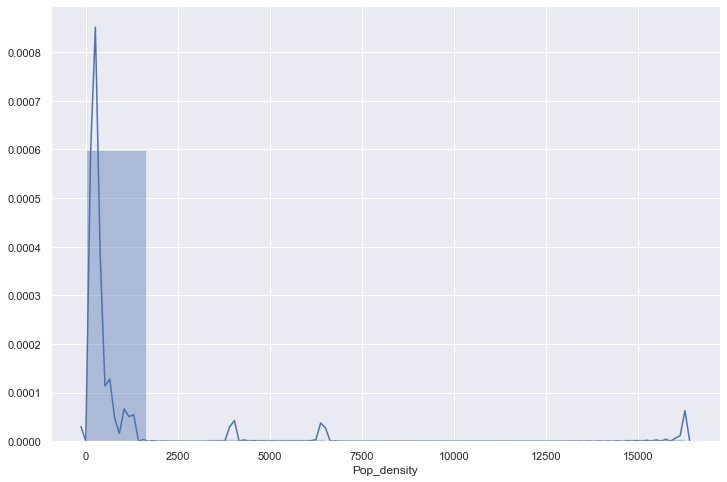

In [473]:
#Análise dos dados
sns.distplot(countries['Pop_density'], bins =10)

In [474]:
def q2():
    discretizer = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile")
    discretizer.fit(countries[["Pop_density"]])
    score_bins = discretizer.transform(countries[["Pop_density"]])
    return int(sum(score_bins[:, 0] == 9))
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [493]:
def q3():
    one_hot_encoder = OneHotEncoder(sparse=False, dtype=np.int)
    climate_encoded = one_hot_encoder.fit_transform(countries[['Climate', 'Region']].fillna(9999))
    return climate_encoded.shape[1]
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [476]:
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("padronizacao", StandardScaler())
])

In [477]:
countries_pipeline = countries.copy()

In [478]:
pipeline_transf = num_pipeline.fit_transform(countries_pipeline[countries.columns[2:]])

In [479]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [480]:
def q4():
    test_country_pipeline=np.array(test_country).reshape(1,20) # Transformando os dados para o formato compatível com DataFrame

    aux_test=pd.DataFrame(test_country_pipeline,columns=countries.columns)

    pipeline_test=num_pipeline.transform(aux_test[countries.columns[2:]]) # Aplicando o pipeline nos dados

    pipeline_result=pd.DataFrame(pipeline_test,columns=countries.columns[2:])

    return float(round(pipeline_result['Arable'],3))
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

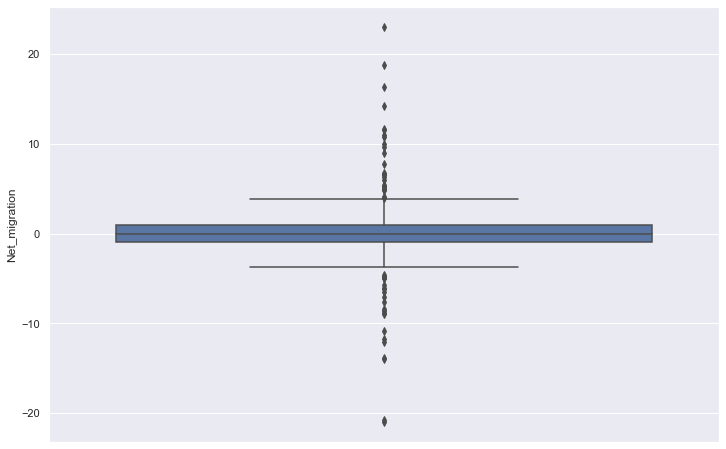

In [481]:
#Analisando os dados
sns.boxplot(countries['Net_migration'], orient="vertical")

In [491]:
q1_quant = countries['Net_migration'].quantile(0.25)
q3_quant = countries['Net_migration'].quantile(0.75)
iqr = q3_quant - q1_quant

non_outlier_interval_iqr = [q1_quant - 1.5 * iqr, q3_quant + 1.5 * iqr]

print(f"Faixa considerada \"normal\": {non_outlier_interval_iqr}") 

Faixa considerada "normal": [-3.8149999999999995, 3.885]


In [483]:
def q5():
    outliers_acima = countries['Net_migration'][(countries['Net_migration'] < non_outlier_interval_iqr[0])]
    outliers_abaixo = countries['Net_migration'][(countries['Net_migration'] > non_outlier_interval_iqr[1])]
    resposta = len(outliers_acima), len(outliers_abaixo), False # não removeria pois a faixa normal é muito estreita
    return tuple(resposta)
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [484]:
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)

In [485]:
def q6():
    count_vectorizer = CountVectorizer()
    
    newsgroup_counts = count_vectorizer.fit_transform(newsgroup.data) # fazendo o fit da função nos dados e já transformando os dados
    
    phone_idx = count_vectorizer.vocabulary_.get('phone') # índice que contém a palavra phone
    
    return int(newsgroup_counts[:, phone_idx].toarray().sum()) # mapeando aonde a palavra phone aparece, transformando em um array e somando o resultado
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [486]:
def q7():
    tfidf_vectorizer = TfidfVectorizer()

    newsgroup_tfidf_vectorized = tfidf_vectorizer.fit_transform(newsgroup.data)
    
    phone_idx = tfidf_vectorizer.vocabulary_.get('phone')
    
    return float(np.round(newsgroup_tfidf_vectorized[:, phone_idx].toarray().sum(),3))
q7()

8.888